<a href="https://colab.research.google.com/github/githubsiddharth07/CNN-DLCovid19/blob/main/CNN_DLCovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DLCovid19: A Deep Learning-based Model for COVID19 Detection using CT Images

![alt text](https://www.cavernoma.org.uk/wp-content/uploads/2020/03/covid-19.png)

## Dataset Discription

The dataset used in this study has been taken from https://github.com/UCSD-AI4H/COVID-CT

The COVID-CT-Dataset has 349 CT images containing clinical findings of COVID-19 from 216 patients. They are in `./Images-processed/CT_COVID.zip`

** Note: *The utility of this dataset has been confirmed by a senior radiologist in Tongji Hospital, Wuhan, China, who has performed diagnosis and treatment of a large number of COVID-19 patients during the outbreak of this disease between January and April.*

The following two images has been taken from the above given dataset, where left image is of covid patient and right image is of non-covid patient.

| Covid CT        | Non-Covid CT           |
| ------------- |:-------------:|
| ![alt text](https://github.com/theclassofai/Covid19_DeepLearning_CT_Scan_Images/blob/master/Images/Covid/2020.02.17.20024018-p17-61%251.png?raw=true)    | ![alt text](https://github.com/theclassofai/Covid19_DeepLearning_CT_Scan_Images/blob/master/Images/NonCovid/2237.png?raw=true) |



In [ ]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 3 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 14.80 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Updating files: 100% (1048/1048), done.


In [ ]:
!unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

Archive:  /content/COVID-CT/Images-processed/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  


In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)):
  dst ="covid" + str(count) + ".png"
  src =path+ filename
  dst =path+ dst
  # rename() function will
  # rename all the files
  os.rename(src, dst)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)):
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename
  dst =path+ dst
  # rename() function will
  # rename all the files
  os.rename(src, dst)

In [ ]:
# Initiate base directory
base_dir = '/content/covid19_CT'
os.mkdir(base_dir)

In [ ]:
# Create directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 50
total validation NonCovid images: 50
total test Covid images: 48
total test NonCovid images: 48


In [ ]:
from keras import backend as K
from tensorflow.keras import models, layers, optimizers

def mish(x):
    return x * K.tanh(K.softplus(x))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=mish, input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation=mish, input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation=mish, input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation=mish, input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation=mish))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation=mish))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=16,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Fit the model
# history = model.fit(train_generator,epochs=35,validation_data=validation_generator)
history = model.fit(train_generator,
                         steps_per_epoch=5,
                         epochs=45,
                         validation_data=validation_generator,
                         validation_steps=5)

Epoch 1/45
5/5 [==============================] - 3s 535ms/step - loss: 0.2150 - acc: 0.9200 - val_loss: 0.5329 - val_acc: 0.7750
Epoch 2/45
5/5 [==============================] - 3s 541ms/step - loss: 0.2040 - acc: 0.9240 - val_loss: 0.5927 - val_acc: 0.7250
Epoch 3/45
5/5 [==============================] - 3s 716ms/step - loss: 0.2258 - acc: 0.8960 - val_loss: 0.5737 - val_acc: 0.7375
Epoch 4/45
5/5 [==============================] - 3s 509ms/step - loss: 0.1929 - acc: 0.9400 - val_loss: 0.5534 - val_acc: 0.8000
Epoch 5/45
5/5 [==============================] - 3s 494ms/step - loss: 0.1975 - acc: 0.9300 - val_loss: 0.6617 - val_acc: 0.7000
Epoch 6/45
5/5 [==============================] - 3s 526ms/step - loss: 0.1807 - acc: 0.9320 - val_loss: 0.6496 - val_acc: 0.7125
Epoch 7/45
5/5 [==============================] - 3s 594ms/step - loss: 0.1618 - acc: 0.9560 - val_loss: 0.6321 - val_acc: 0.7250
Epoch 8/45
5/5 [==============================] - 3s 556ms/step - loss: 0.2442 - acc: 0.88

In [ ]:
 import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

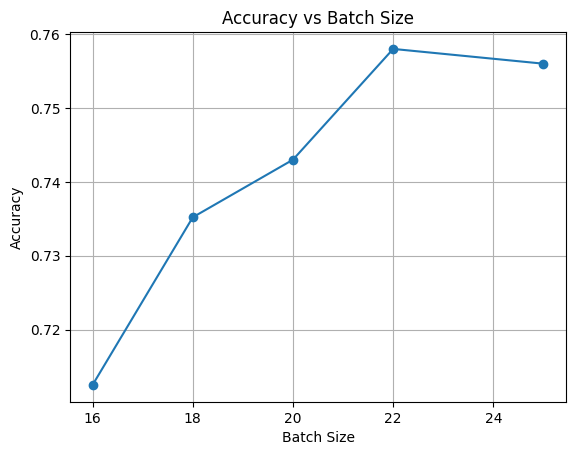

In [ ]:
import matplotlib.pyplot as plt

batch_sizes = [16,18,20,22,25]
accuracies = [0.7125,0.7352 ,0.743,0.758,0.756]

plt.plot(batch_sizes, accuracies, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.grid(True)
plt.show()


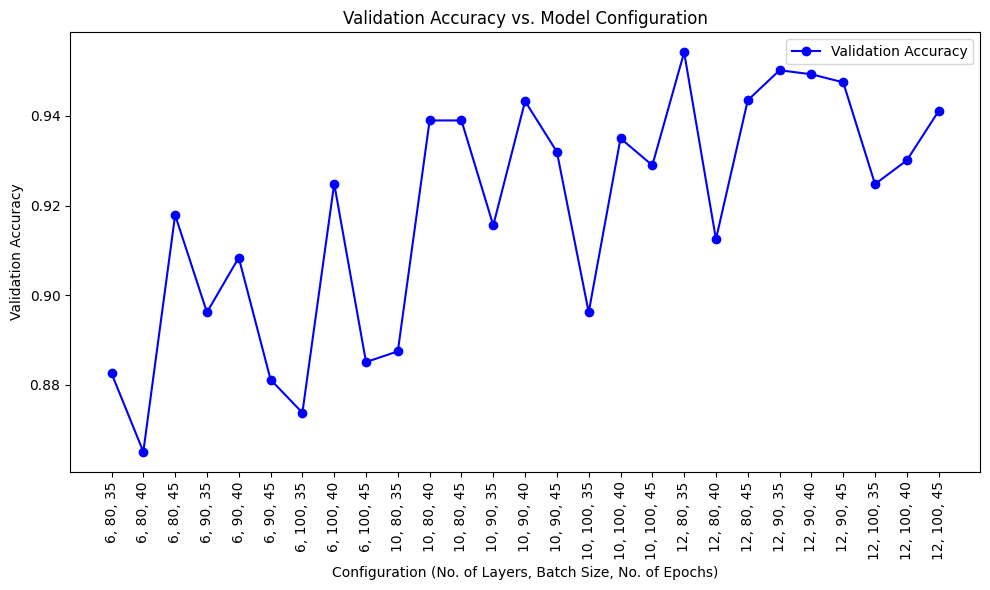

In [ ]:
import matplotlib.pyplot as plt

# Inputs
layers = [6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12]
batch_sizes = [80, 80, 80, 90, 90, 90, 100, 100, 100, 80, 80, 80, 90, 90, 90, 100, 100, 100, 80, 80, 80, 90, 90, 90, 100, 100, 100]
epochs = [35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45, 35, 40, 45]

# Outputs (Validation Accuracy)
val_accuracy = [
    0.8826, 0.8651, 0.9179, 0.8962, 0.9084, 0.8812, 0.8738,
    0.9249, 0.8851, 0.8875, 0.9390, 0.9390, 0.9156, 0.9433,
    0.9320, 0.8962, 0.9350, 0.9290, 0.9542, 0.9125, 0.9435,
    0.9502, 0.9493, 0.9475, 0.9248, 0.9301, 0.9411
]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(val_accuracy, marker='o', linestyle='-', color='blue', label='Validation Accuracy')
ax.set_xticks(range(len(val_accuracy)))
ax.set_xticklabels([f'{layers[i]}, {batch_sizes[i]}, {epochs[i]}' for i in range(len(val_accuracy))], rotation=90)
ax.set_xlabel('Configuration (No. of Layers, Batch Size, No. of Epochs)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy vs. Model Configuration')
ax.legend()
plt.tight_layout()
plt.show()


NameError: ignored

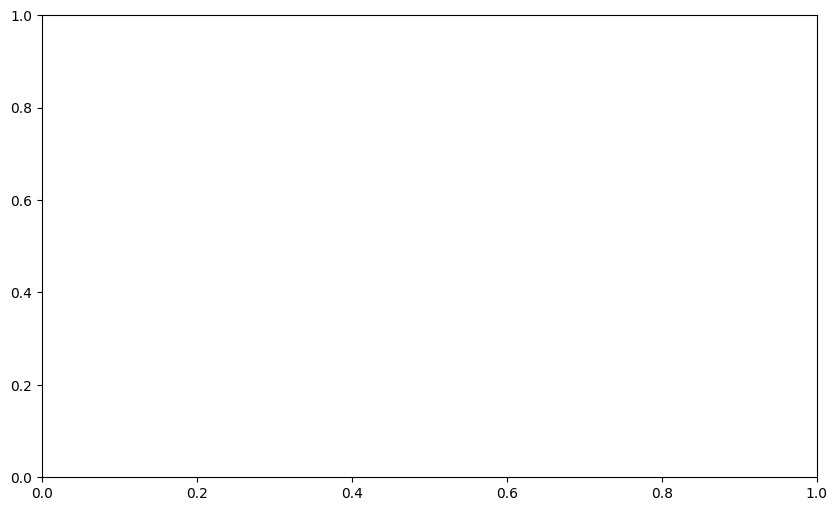

In [ ]:
import matplotlib.pyplot as plt

# Inputs
layers = [12, 12, 12, 12, 12, 12, 12, 12, 12]
batch_sizes = [80,80,80,90,90,90,100,100,100]
epochs = [35, 40, 45, 35, 40, 45, 35, 40, 45]

# Outputs (Validation Accuracy)
map = [
0.394,
0.376,
0.483,
0.502,
0.492,
0.418,
0.411,
0.342,
0.397
]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(map)), map, marker='o', linestyle='-', color='blue')
ax.set_xticks(range(len(map)))
ax.set_xticklabels([f'{layers[i]}, {batch_sizes[i]}, {epochs[i]}' for i in range(len(map))], rotation=90)
ax.set_xlabel('Configuration (No. of Layers, Batch Size, No. of Epochs)')
ax.set_ylabel('map(mean average precision)')
ax.set_title('map(mean average precision) vs. Model Configuration')
plt.tight_layout()
plt.show()

